# Multiple Linear Regression Assignment(Toyota Corolla)

## Dataset:-ToyotaCorolla.csv

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Load Dataset
data = pd.read_csv('C:/Users/Hi/Downloads/ToyotaCorolla.csv', encoding= 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.nunique()

Id                  1436
Model                372
Price                236
Age_08_04             77
Mfg_Month             12
Mfg_Year               7
KM                  1263
Fuel_Type              3
HP                    12
Met_Color              2
Color                 10
Automatic              2
cc                    13
Doors                  4
Cylinders              1
Gears                  4
Quarterly_Tax         13
Weight                59
Mfr_Guarantee          2
BOVAG_Guarantee        2
Guarantee_Period       9
ABS                    2
Airbag_1               2
Airbag_2               2
Airco                  2
Automatic_airco        2
Boardcomputer          2
CD_Player              2
Central_Lock           2
Powered_Windows        2
Power_Steering         2
Radio                  2
Mistlamps              2
Sport_Model            2
Backseat_Divider       2
Metallic_Rim           2
Radio_cassette         2
Tow_Bar                2
dtype: int64

In [6]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

# Data Preprocessing and Visualization

In [8]:
# Copying selected features in new dataset
data1 = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
# Renaming some features for the ease of usage 
data1 = data1.rename({'Age_08_04':'Age', 'cc':'CC'}, axis = 1)
data1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
# Checking for duplicate values
data1[data1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
# Dropping duplicate values
data1 = data1.drop_duplicates().reset_index(drop=True)
data1

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


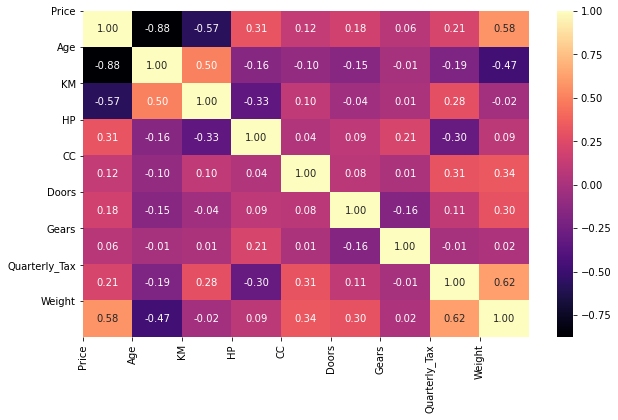

In [12]:
# Correlation analysis for new data
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

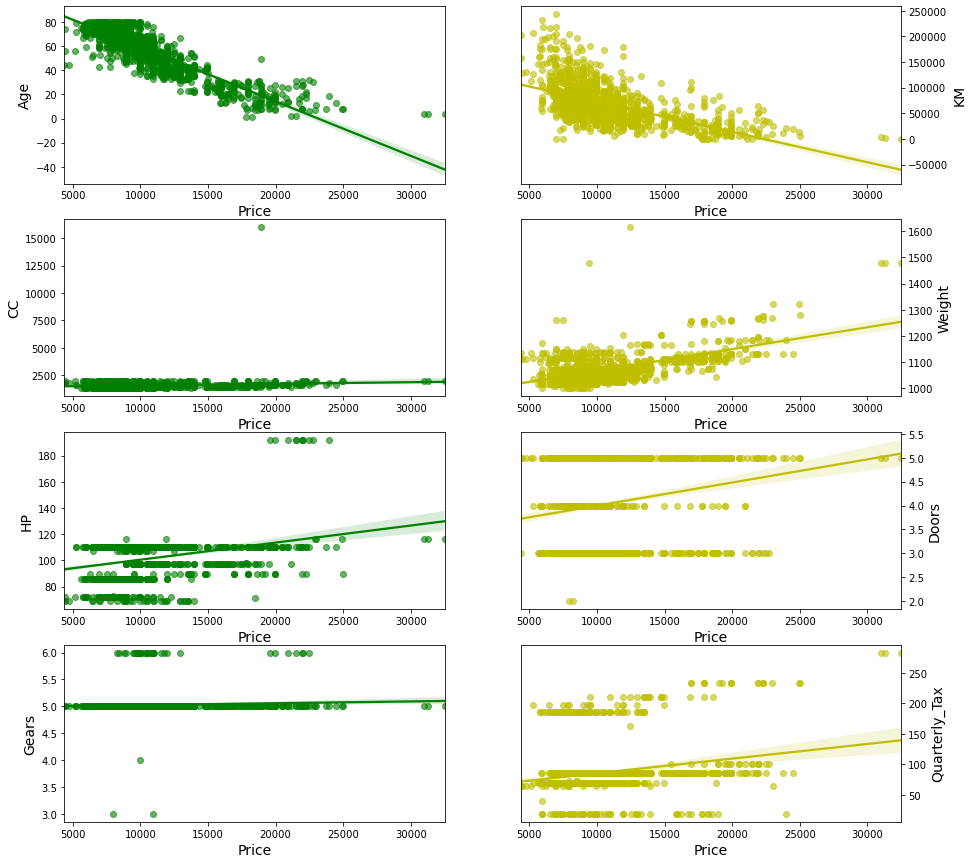

In [13]:
# plot regplots  for Age, KM, HP, CC, Doors, Gears, Quarterly_Tax and Weight against Price 
f, axes = plt.subplots(4,2, figsize=(15,15))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age', data = data1, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = data1, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'CC', data = data1, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('CC', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = data1, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

# HP Vs Price
sns.regplot(x = 'Price', y = 'HP', data = data1, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('Price', fontsize = 14)
axes[2,0].set_ylabel('HP', fontsize=14)
axes[2,0].yaxis.tick_left()

# Doors Vs Price
sns.regplot(x = 'Price', y = 'Doors', data = data1, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('Price', fontsize = 14)
axes[2,1].set_ylabel('Doors', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()

# Gears Vs Price
sns.regplot(x = 'Price', y = 'Gears', data = data1, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('Price', fontsize = 14)
axes[3,0].set_ylabel('Gears', fontsize=14)
axes[3,0].yaxis.tick_left()

# Quarterly_Tax Vs Price
sns.regplot(x = 'Price', y = 'Quarterly_Tax', data = data1, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('Price', fontsize = 14)
axes[3,1].set_ylabel('Quarterly_Tax', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

plt.show()

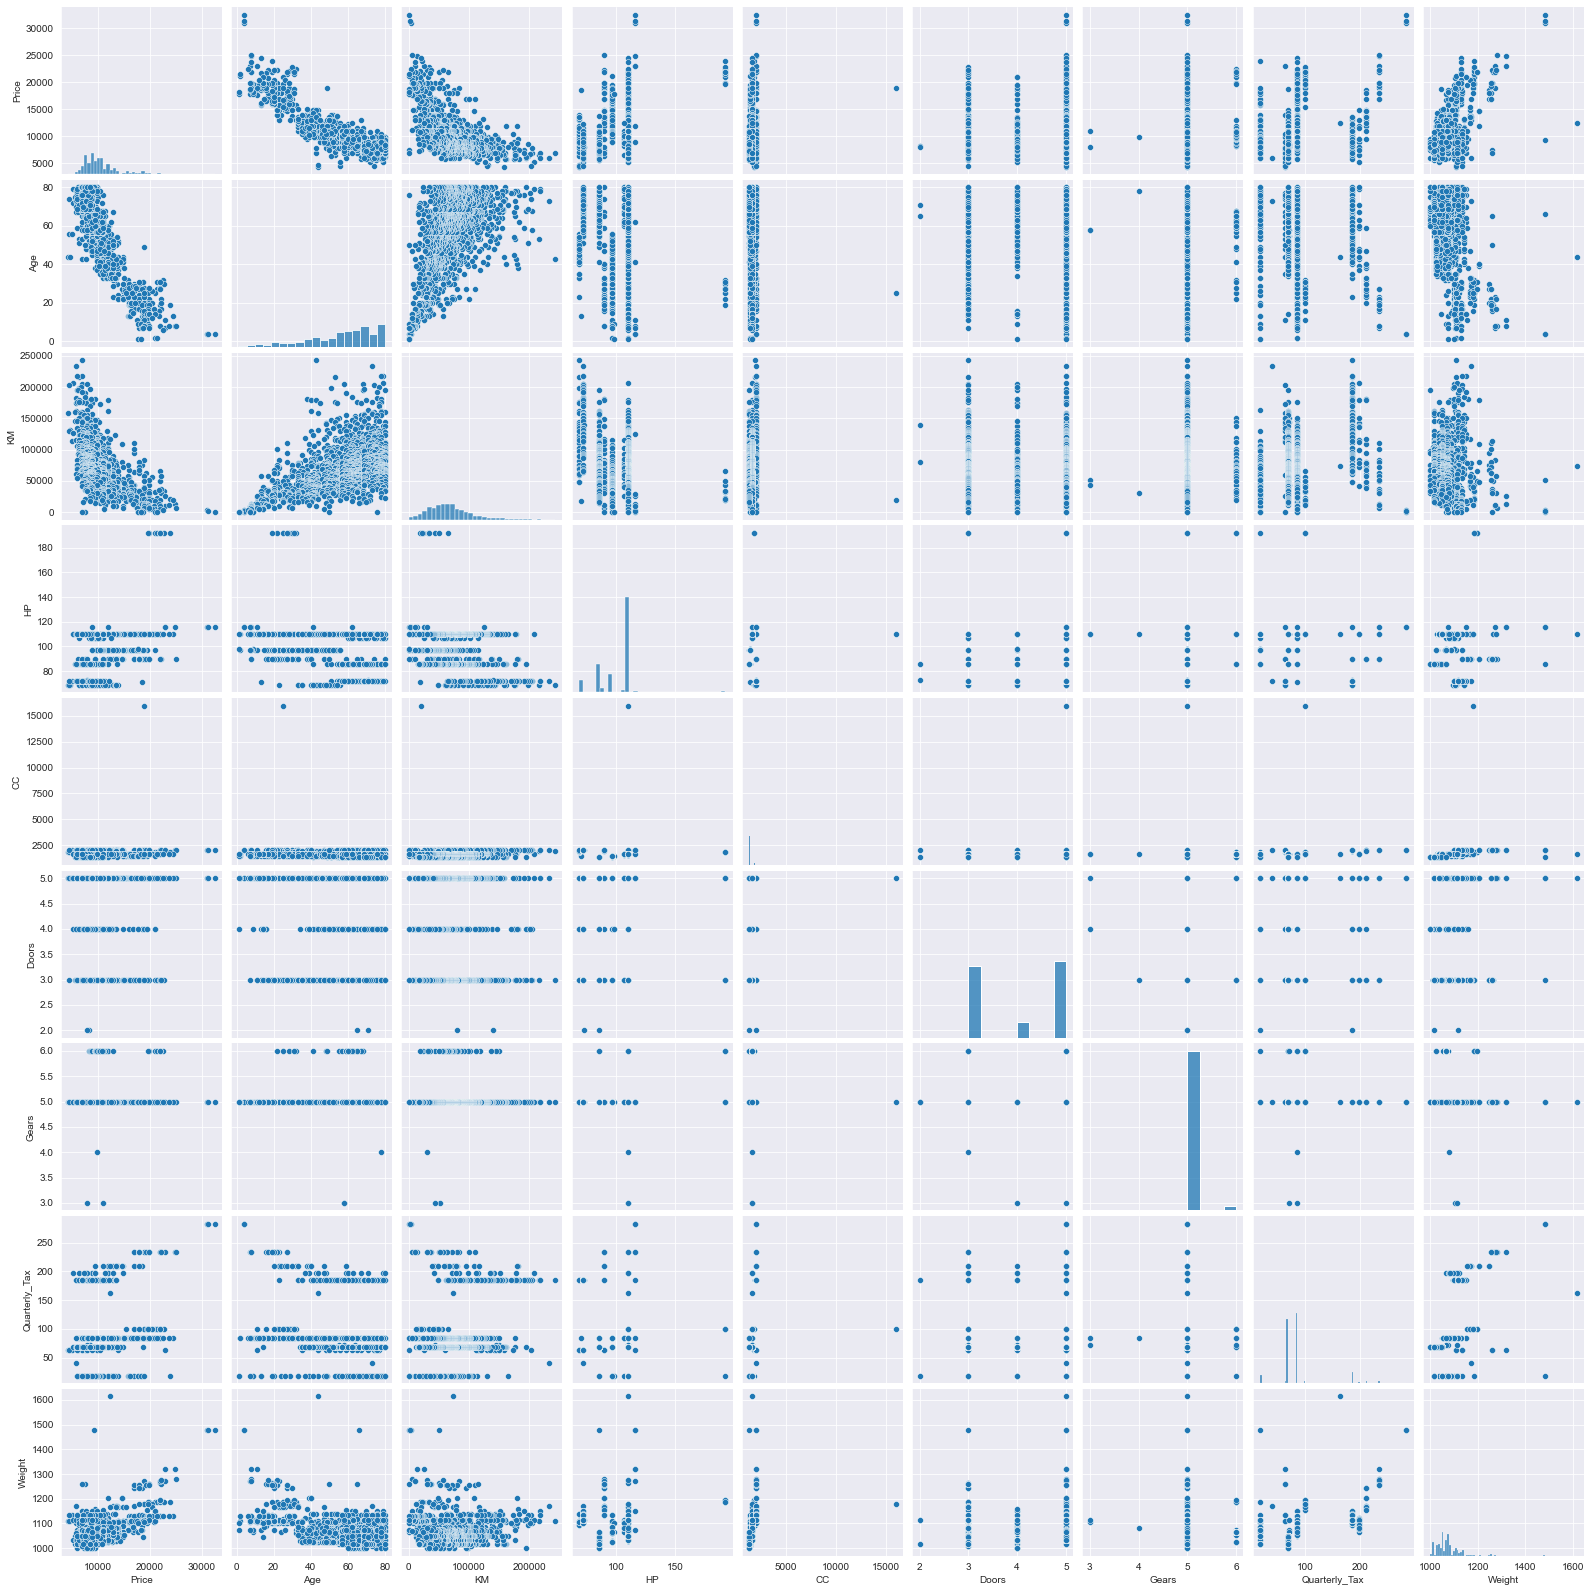

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model Building using Statsmodels.formula.api

In [15]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit()

## Fetching Parameters from Model for Testing

In [16]:
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
CC                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [17]:
# Finding tvalues and pvalues
print("tvalues")
print(model.tvalues)
print("pvalues")
print(np.round(model.pvalues, 5))

tvalues
Intercept        -3.875273
Age             -46.551876
KM              -16.552424
HP               11.209719
CC               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64
pvalues
Intercept        0.00011
Age              0.00000
KM               0.00000
HP               0.00000
CC               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64


In [18]:
# Finding rsquared values
print("R2: ", model.rsquared)
print("R2_Adj: ", model.rsquared_adj)

R2:  0.8625200256947
R2_Adj:  0.8617487495415146


In [19]:
# Model Price~CC 
slr_c=smf.ols('Price~CC',data=data1).fit()
print("tvalu",slr_c.tvalues)
print("pvalue",slr_c.pvalues)
print("R2: ",slr_c.rsquared)
print("R2_Adj: ",slr_c.rsquared_adj)

tvalu Intercept    24.879592
CC            4.745039
dtype: float64
pvalue Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64
R2:  0.015469019620240387
R2_Adj:  0.014781977763729803


In [20]:
# Model Price~Doors 
slr_c=smf.ols('Price~Doors',data=data1).fit()
print("tvalu",slr_c.tvalues)
print("pvalue",slr_c.pvalues)
print("R2: ",slr_c.rsquared)
print("R2_Adj: ",slr_c.rsquared_adj)

tvalu Intercept    19.421546
Doors         7.070520
dtype: float64
pvalue Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64
R2:  0.033710397123388525
R2_Adj:  0.03303608476967146


In [21]:
mlr_cd=smf.ols('Price~CC+Doors',data=data1).fit()
print("tvalu",mlr_cd.tvalues)
print("pvalue",mlr_cd.pvalues)
print("R2: ",mlr_cd.rsquared)
print("R2_Adj: ",mlr_cd.rsquared_adj)

tvalu Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64
pvalue Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64
R2:  0.04584777187118705
R2_Adj:  0.044515157027431695


# Model Validation
## Checking for collinearity in the features

In [22]:
# Calculating VIF (Variance Inflation Factor) for Predictors

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Weight+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax',data=data1).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+Weight+Quarterly_Tax',data=data1).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=data1).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)



# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_Gears,vif_Quarterly_Tax,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


## Residual Analysis

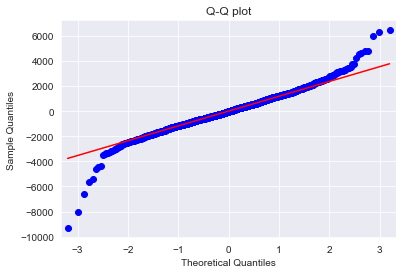

In [23]:
# Checking normality of the residuals with Q-Q plot
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [24]:
# Checking for Homoscedasticity of the residuals

# Defining function to calculate Standardized values(Z_score) of model's fitted values and residual values 
def get_stnd_values(value):
    mean = value.mean()
    dev = value.std()
    return((value - mean)/dev)

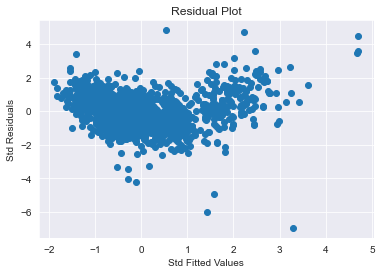

In [25]:
plt.scatter(get_stnd_values(model.fittedvalues),get_stnd_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Std Fitted Values')
plt.ylabel('Std Residuals')
plt.show()

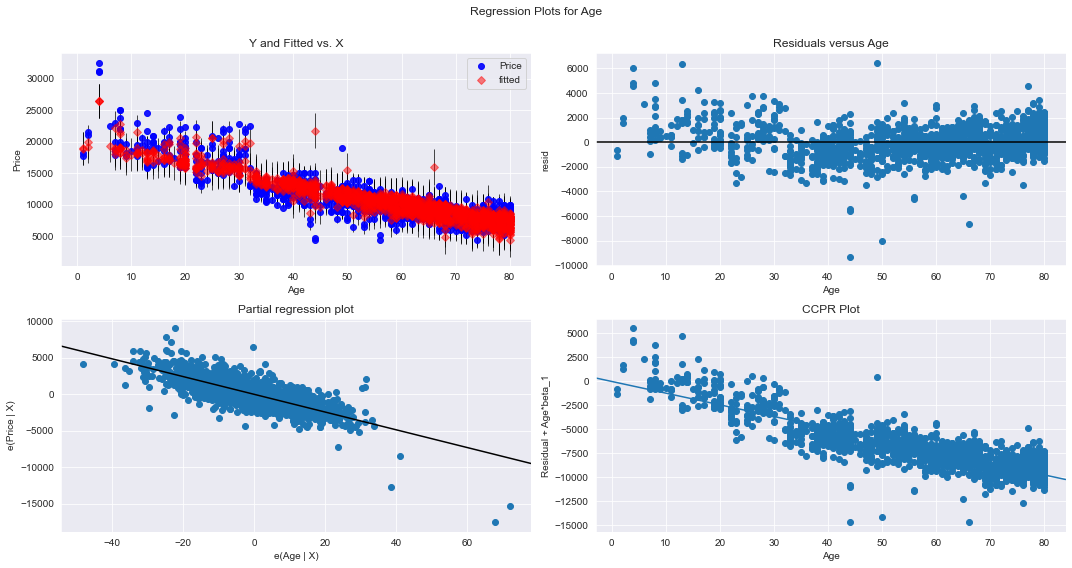

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

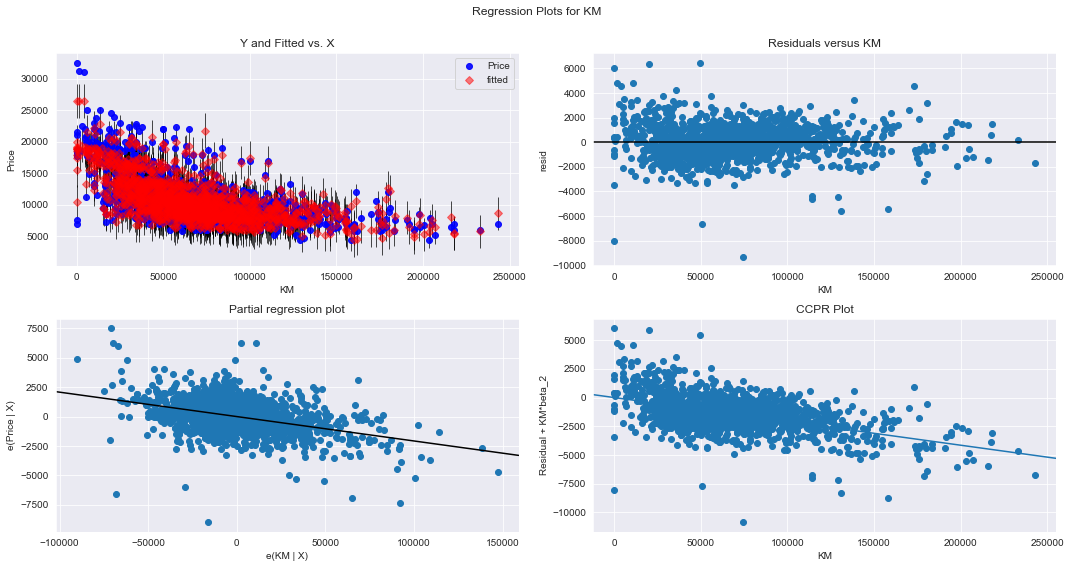

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

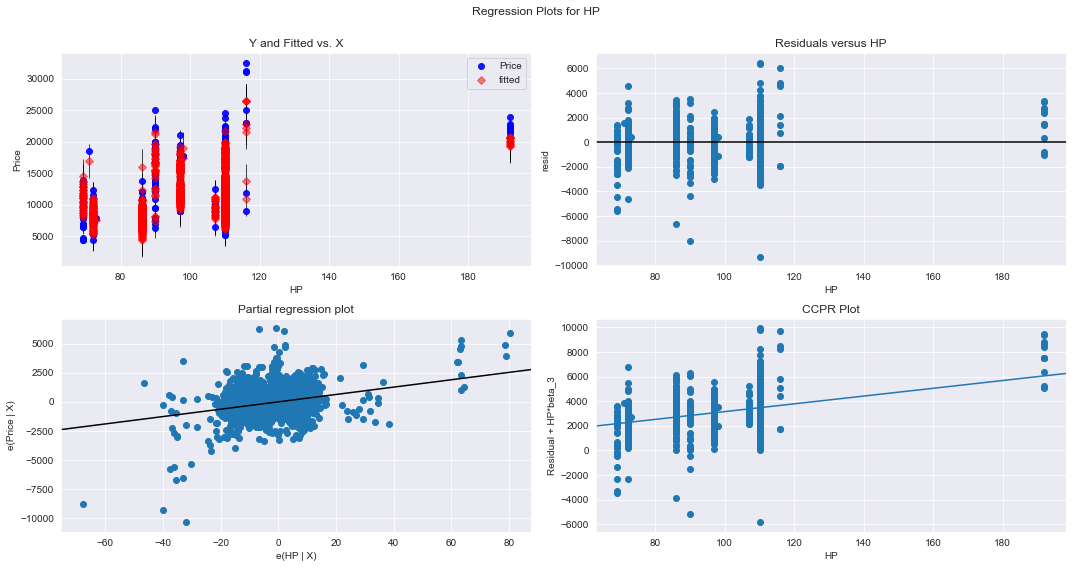

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

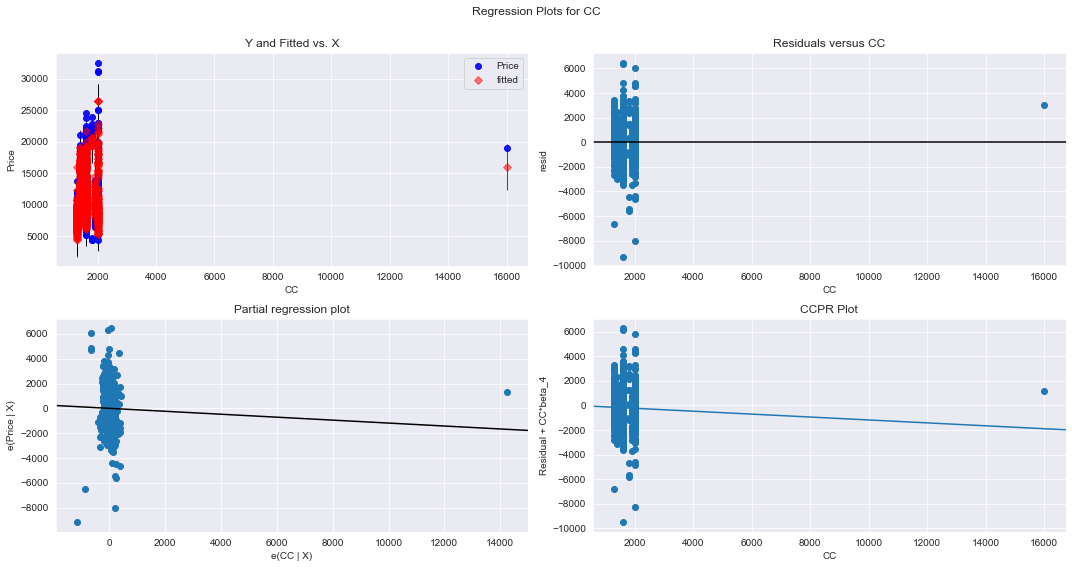

()

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()


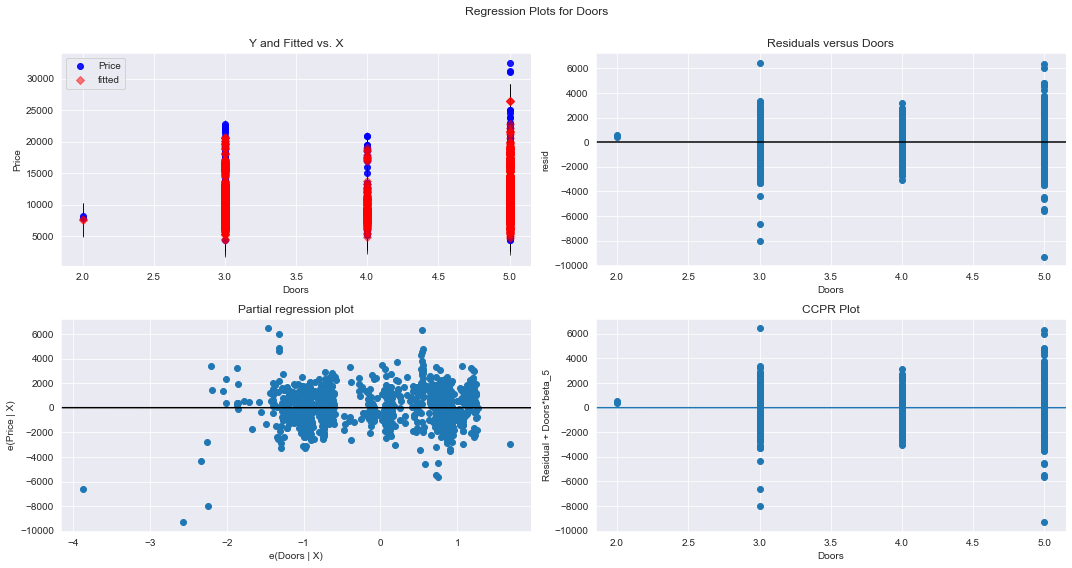

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

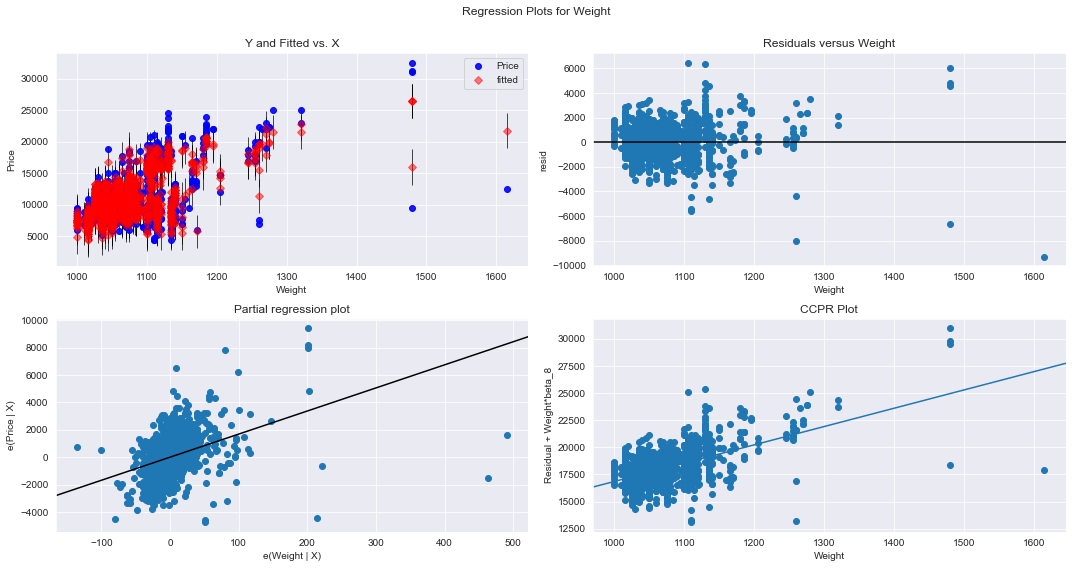

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

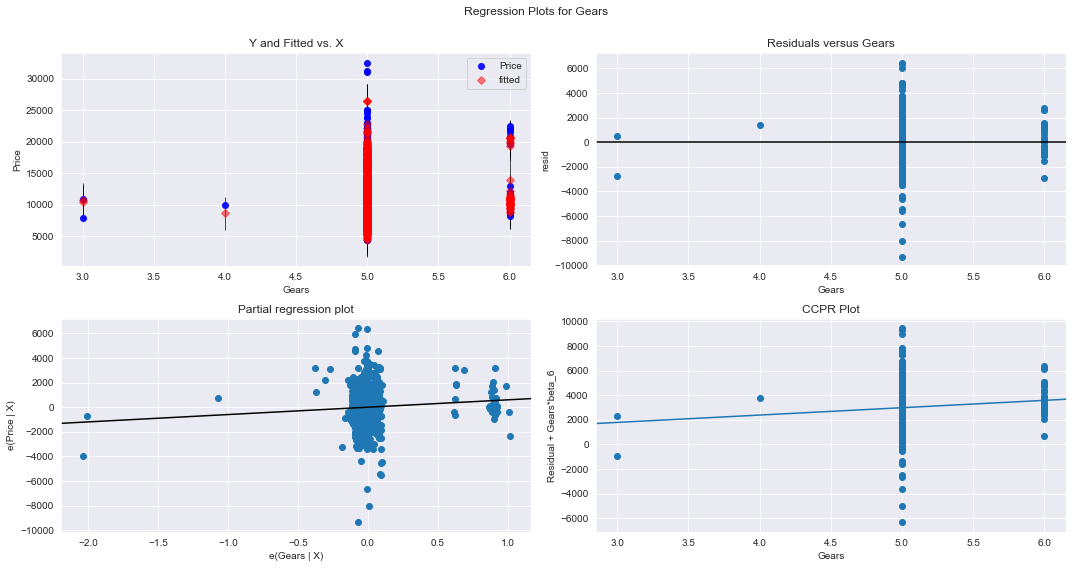

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

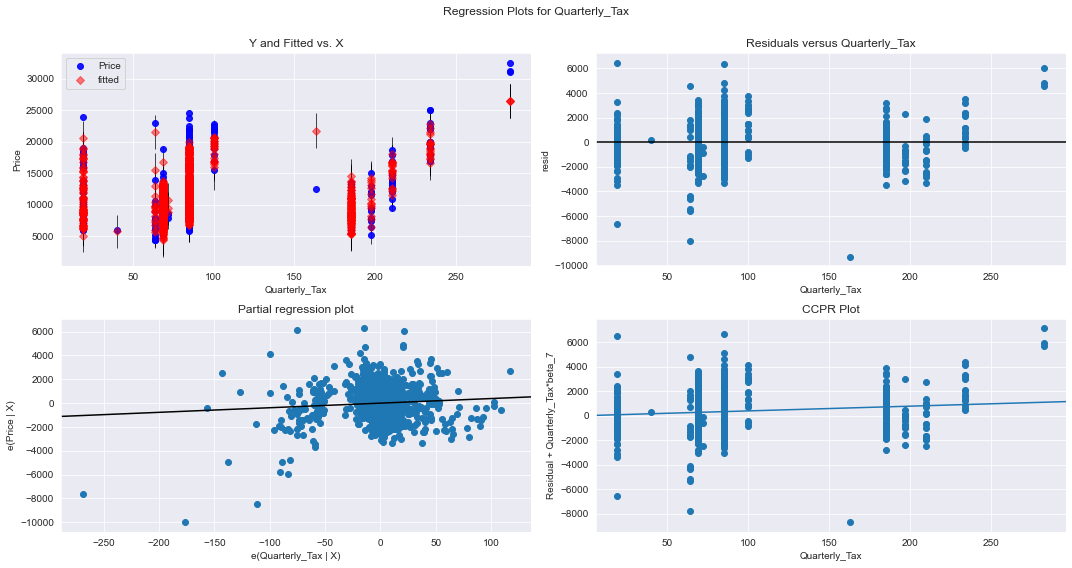

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

# Model Deletion Diagnostics
## Cook's Distance

In [34]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

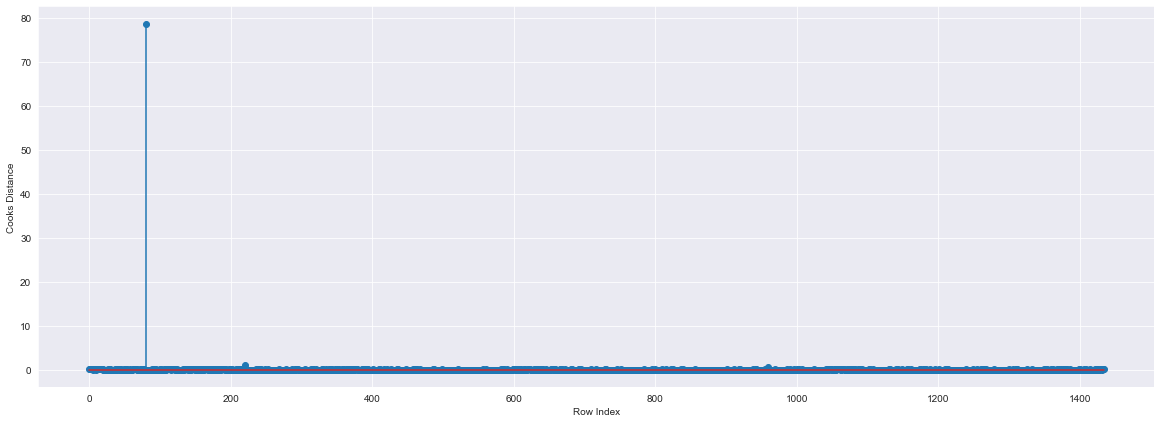

In [35]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
np.argmax(c) , np.max(c)

(80, 78.72950582257265)

## Hat Points (Leverage Plot)

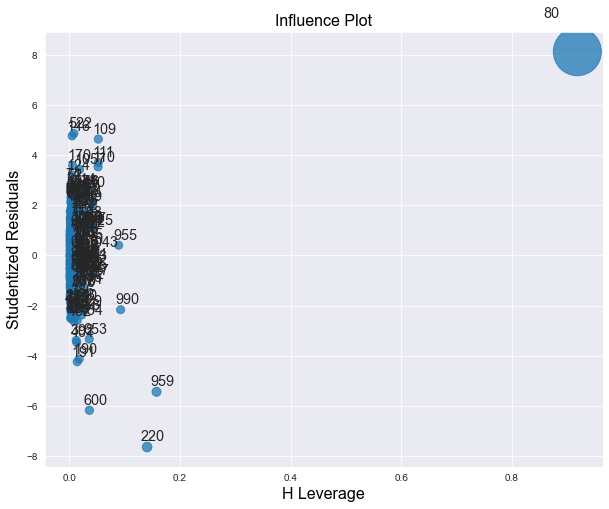

In [37]:
fig,ax=plt.subplots(figsize=(10,8))
fig=influence_plot(model,ax = ax)

In [38]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [39]:
data1[data1.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Model Improvation

In [40]:
# Creating a copy of data so that original dataset is not affected
data_new=data1.copy()
data_new

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [41]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data_new=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
data_new

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [42]:
count = 0
model=smf.ols('Price~Age+KM+HP+CC+Doors+Weight+Gears+Quarterly_Tax',data=data_new).fit()
(c,_)=model.get_influence().cooks_distance
c
while np.max(c) > 0.5:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Weight+Gears+Quarterly_Tax',data=data_new).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    data_new=data_new.drop(data_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_new
    print(np.argmax(c) , np.max(c))
    count += 1
    print(count)
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Weight+Gears+Quarterly_Tax',data=data_new).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

219 2.2253513655271853
1
957 2.5307796232782835
2
598 0.3168903540146558
3
Thus model accuracy is improved to 0.8882395145171204


In [43]:
data_new.shape

(1431, 9)

# Checking predictions made by model

In [44]:
predicted_price = final_model.predict(data_new)
pred_df = pd.DataFrame({'Price_Actual' : data_new.Price, 'Price_Predicted' : predicted_price})
pred_df

,Price_Actual,Price_Predicted
0,13500,16345.352610
1,13750,15886.635544
2,13950,16328.224968
3,14950,15996.318854
4,13750,15883.424182
...,...,...
1426,7500,9161.230587
1427,10845,8536.091326
1428,8500,8681.531063
1429,7250,8793.668694


In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data_new.Price, predicted_price))  
print('Mean Squared Error:', metrics.mean_squared_error(data_new.Price, predicted_price))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_new.Price, predicted_price)))
print("R^2 Score :          ", metrics.r2_score(data_new.Price, predicted_price))

Mean Absolute Error: 911.3784746425407
Mean Squared Error: 1452030.495861365
Root Mean Squared Error: 1205.0022804382427
R^2 Score :           0.8882395145171204


In [46]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:07:07   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age            -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM               -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP               34.2632      2.714     12.625      0.000      28.940      39.587
CC               -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors          -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Weight           32.1321      1.289     24.931      0.000      29.604      34.660
Gears           469.5788    177.682      2.643      0.008     121.033     818.125
Quarterly_Tax     3.6472      1.363      2.676      0.008       0.973       6.321
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Building Using sklearn library

In [47]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [48]:
data1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Data Preprocessing for model

In [59]:
# Diving data into Predictors and Target Variable
X = data1.drop('Price', axis = 1).values
Y = data1.iloc[:,0].values.reshape(-1,1)

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [63]:
# Checking splitted sets
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (1076, 8)
Shape of X_test:  (359, 8)
Shape of Y_train:  (1076, 1)
Shape of Y_test:  (359, 1)


In [64]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

## Getting important parameters from model

In [65]:
from sklearn.metrics import r2_score
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  -0.02201912605190759
R2_score (train):  0.005900558653788801
R2_score (test):  -0.00762164437029722
RMSE:  3739.4621213678024


 # Polynomial Regression - 2nd degree

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

## Getting important parameters from model

In [67]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  -0.02201912605190759
R2_score (train):  0.03588472848540636
R2_score (test):  -0.049816261113424964
RMSE:  3816.9550208720143
